In [ ]:
import configue
import matplotlib.pyplot as plt
import pandas as pd
from dataset import get_text_dfs
from model import get_tokenizer

In [ ]:
config = configue.load("config.yaml")
dfs = get_text_dfs(config)

In [7]:
for df in dfs : 
    df["length"] = df["text"].apply(len)

In [15]:
cut_at = 1024
print(f"Cutting at length {cut_at} leaves {round(len(dfs[0][dfs[0]['length'] < cut_at])/len(dfs[0]) * 100)}% of the training dataset unchanged.")

Cutting at length 1024 leaves 64% of the training dataset unchanged.


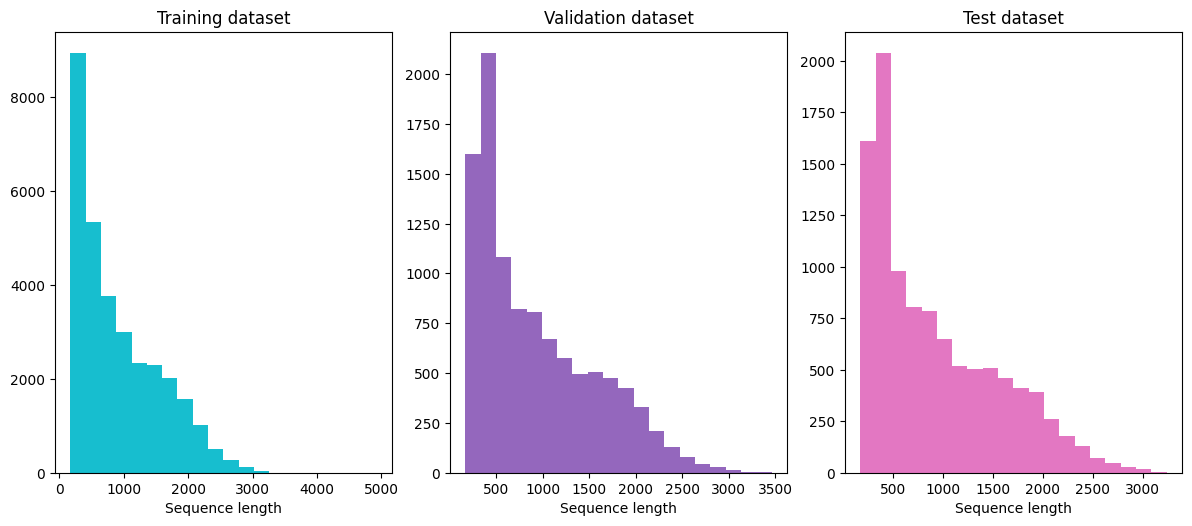

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=len(dfs), figsize=(12, 5))
plt.tight_layout()
titles = ["Training dataset", "Validation dataset", "Test dataset"]
colors = ["tab:cyan", "tab:purple", "tab:pink"]
for i, ax in enumerate(axes) : 
    dfs[i]["length"].hist(ax=ax, bins=20, color=colors[i])
    ax.set_title(titles[i])
    ax.set_xlabel("Sequence length")
    ax.grid(visible=False)
plt.show()

In [17]:
tokenizer = get_tokenizer()
train_df = dfs[0]
valid_df = dfs[1]
test_df = dfs[2]

In [18]:
valid_df["input_ids"] = valid_df["text"].apply(lambda x : tokenizer(x)["input_ids"])

Token indices sequence length is longer than the specified maximum sequence length for this model (1231 > 1024). Running this sequence through the model will result in indexing errors


In [19]:
train_df["input_ids"] = train_df["text"].apply(lambda x : tokenizer(x)["input_ids"])

In [20]:
test_df["input_ids"] = test_df["text"].apply(lambda x : tokenizer(x)["input_ids"])

In [21]:
train_df_counts = train_df["input_ids"].explode().value_counts()

In [22]:
valid_df_counts = valid_df["input_ids"].explode().value_counts()

In [23]:
test_df_counts = test_df["input_ids"].explode().value_counts()

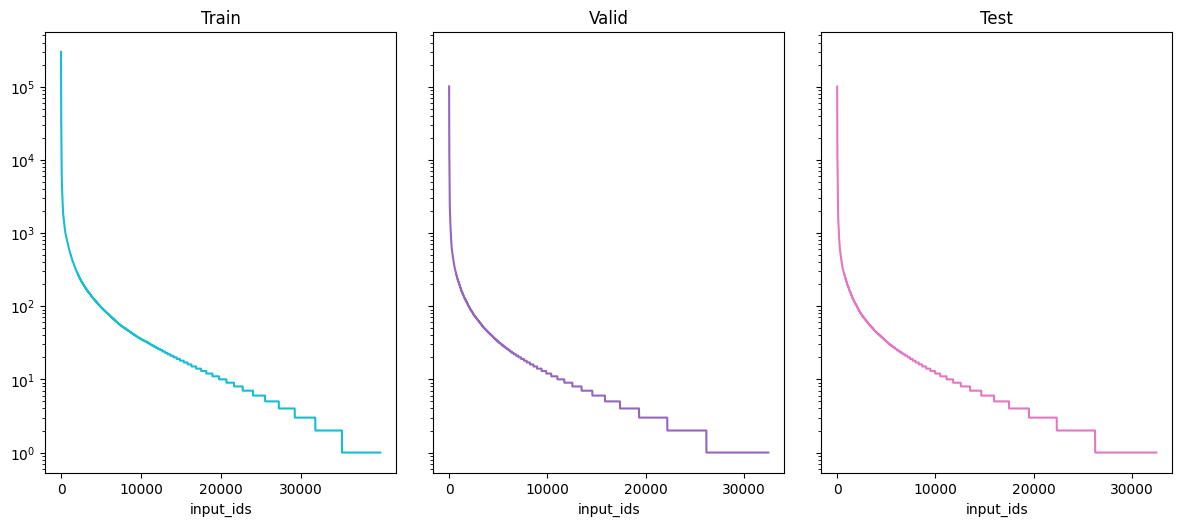

In [25]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 5), sharey=True)
plt.tight_layout()
df_counts = [train_df_counts, valid_df_counts, test_df_counts]
titles = ["Train", "Valid", "Test"]
colors = ["tab:cyan", "tab:purple", "tab:pink"]
for i, ax in enumerate(axes) : 
    df_count = df_counts[i]
    df_count.plot(ax = ax, color=colors[i])
    ax.set_yscale('log')
    ax.set_title(titles[i])
    ax.set_xticks([i for i in range(0, len(df_count.index), 10000)])
    ax.set_xticklabels([i for i in range(0, len(df_count.index), 10000)])
plt.show()

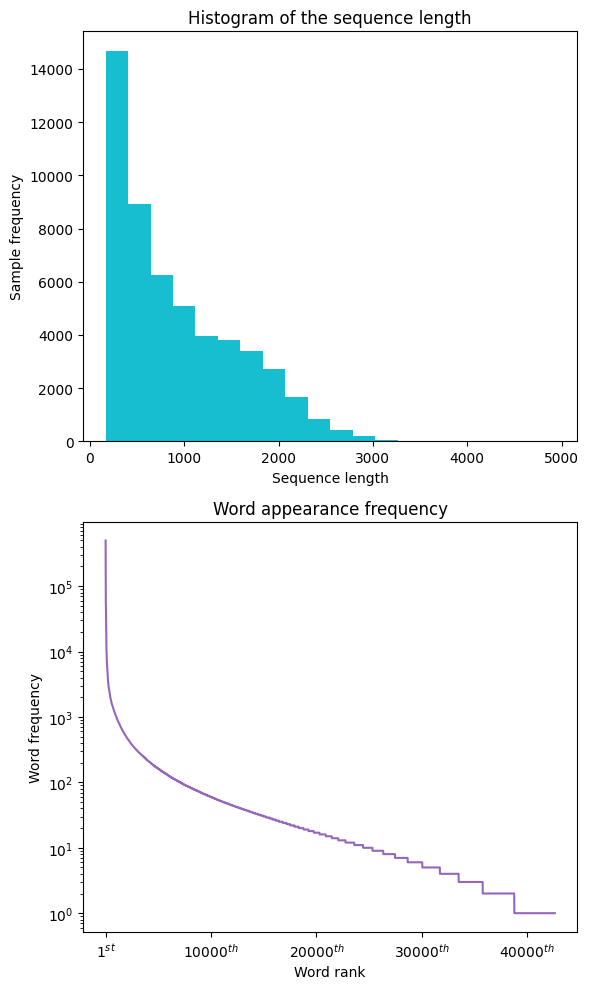

In [43]:


fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(6, 10), tight_layout=True)
colors = ["tab:cyan", "tab:purple", "tab:pink"]

big_df = pd.concat(dfs)
big_df["length"].hist(ax=ax1, bins=20, color=colors[0])
ax1.set_title("Histogram of the sequence length")
ax1.set_xlabel("Sequence length")
ax1.set_ylabel("Sample frequency")
ax1.grid(visible=False)



big_df_counts = big_df["input_ids"].explode().value_counts()
big_df_counts.plot(ax = ax2, color=colors[1])
ax2.set_yscale('log')
ax2.set_xticks([i for i in range(0, len(big_df_counts.index), 10000)])
xtickslabels = ["$" + str(i) + "^{th}$" for i in range(0, len(big_df_counts.index), 10000)]
xtickslabels[0] = "$1^{st}$"
ax2.set_xticklabels(xtickslabels)
ax2.set_ylabel("Word frequency")
ax2.set_xlabel("Word rank")
ax2.set_title("Word appearance frequency")


plt.show()

In [65]:
with_input = big_df[big_df["input"] != ""]
with_input[with_input["length"] == with_input["length"].min()].iloc[0]["text"]

'Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n\n### Instruction:\nDivide this number by 6\n\n### Input:\n36\n\n### Response:\n6.0'